# Imports

In [ ]:
import pathlib
import numpy as np 
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd 
import seaborn as sns
import sklearn
import cv2

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,KFold,cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 15

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
#split into testing and training data  

(x_train, y_train) ,(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:

print("shape of training data ",x_train.shape)
print("shape of testing data ",x_test.shape)
print("shape of training data outputs ",y_train.shape)
print("shape of testing data outputs ",y_test.shape)


shape of training data  (50000, 32, 32, 3)
shape of testing data  (10000, 32, 32, 3)
shape of training data outputs  (50000, 1)
shape of testing data outputs  (10000, 1)


In [ ]:
print("shape of one input image  ",x_train[0].shape)
print()
# range of target variable 
print("Max value in target varaibles ",int(max(y_train)))
print("Min value in target variables ",int(min(y_train)))

shape of one input image   (32, 32, 3)

Max value in target varaibles  9
Min value in target variables  0


In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Data Visualisation

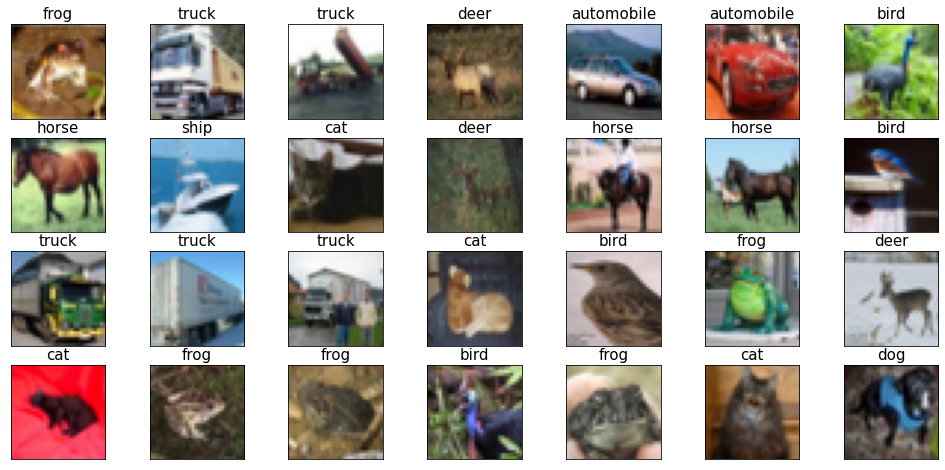

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=4, figsize=(17, 8))
index = 0
for i in range(4):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(x_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])

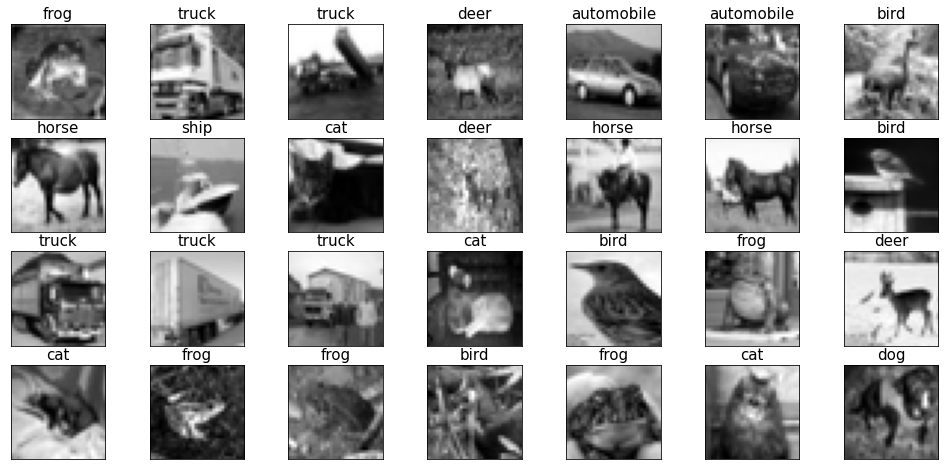

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=4, figsize=(17, 8))
index = 0
for i in range(4):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
# Preprocessing Data

x_train  = x_train/255
x_test  = x_test/255

In [ ]:
x_train_ = np.reshape(x_train, (x_train.shape[0], -1))
x_test_ = np.reshape(x_test, (x_test.shape[0], -1))
print(x_train_.shape, x_test_.shape)

(50000, 3072) (10000, 3072)


In [ ]:
y_train_ = pd.DataFrame(y_train,columns = ['output'])
y_test_ = pd.DataFrame(y_test,columns = ['output'])

In [ ]:
type(x_train_)

numpy.ndarray

In [ ]:
x = [x_train_[i] for i in range(5000)]
y = [y_train[i] for i in range(5000)]



In [ ]:
train_accuracy =  []
test_accuracy = []
classifiers = []
pred = []
reports = []
k_choices = [5, 8, 10, 20, 30, 50, 100,150]
for k in k_choices:
  print("k = ",k)
  classifier = KNeighborsClassifier(n_neighbors=k, weights='distance',algorithm = 'auto')
  classifier.fit(x, y)
  train_acc = classifier.score(x,y)
  print("Train Accuracy = ",train_acc)
  train_accuracy.append(train_acc)
  test_acc = classifier.score(x_test_,y_test_.values.ravel())
  predictions = classifier.predict(x_test_)
  pred.append(predictions)
  print("Test Accuracy = ",test_acc)
  test_accuracy.append(test_acc)
  classifiers.append(classifier)
  reports.append(classification_report(y_test_.values.ravel(), predictions))
  #dists = classifier.compute_distances_two_loops(x_test)
  #plt.imshow(dists, interpolation='none')
  #plt.show()

k =  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Train Accuracy =  1.0
Test Accuracy =  0.2877
k =  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Train Accuracy =  1.0
Test Accuracy =  0.2935
k =  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Train Accuracy =  1.0
Test Accuracy =  0.2904
k =  20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Train Accuracy =  1.0
Test Accuracy =  0.2854
k =  30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Train Accuracy =  1.0
Test Accuracy =  0.278
k =  50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Train Accuracy =  1.0
Test Accuracy =  0.2708
k =  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Train Accuracy =  1.0
Test Accuracy =  0.2609
k =  150


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Train Accuracy =  1.0
Test Accuracy =  0.2539


In [ ]:
for i in range(len(test_accuracy)):
  test_accuracy[i] = test_accuracy[i]*100

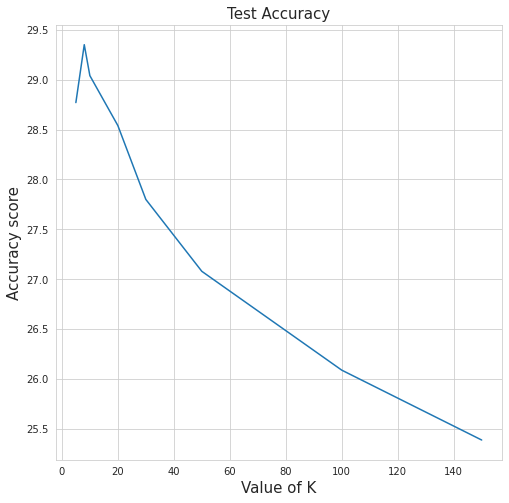

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Test Accuracy')
sns.set_style('whitegrid')
plt.xlabel('Value of K')
plt.ylabel('Accuracy score')
sns.lineplot(x=k_choices, y=test_accuracy)

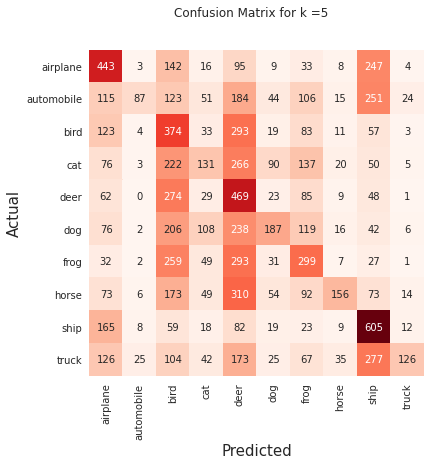

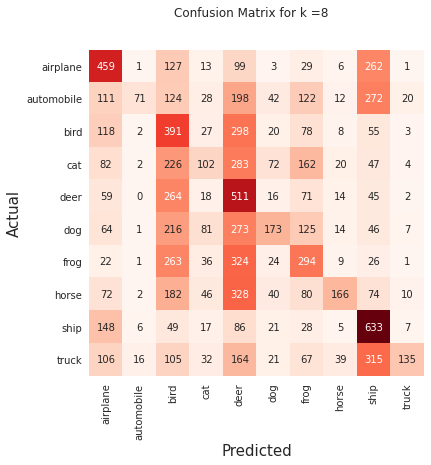

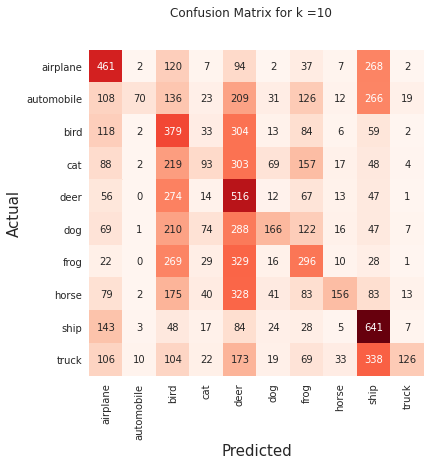

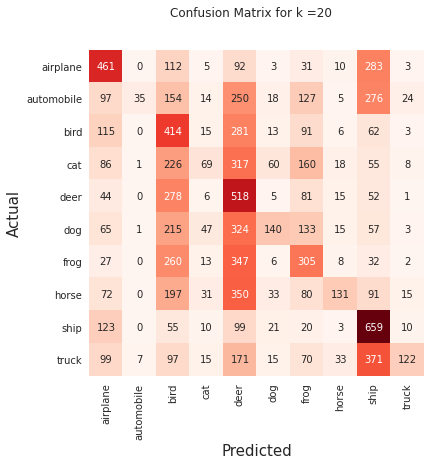

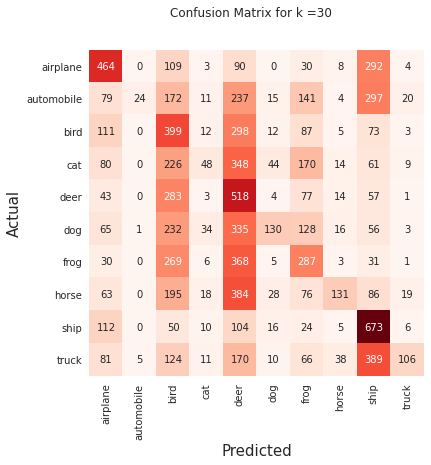

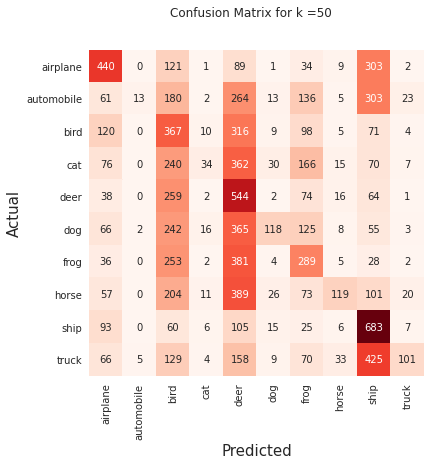

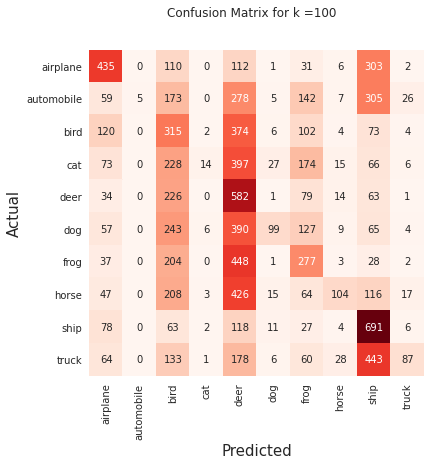

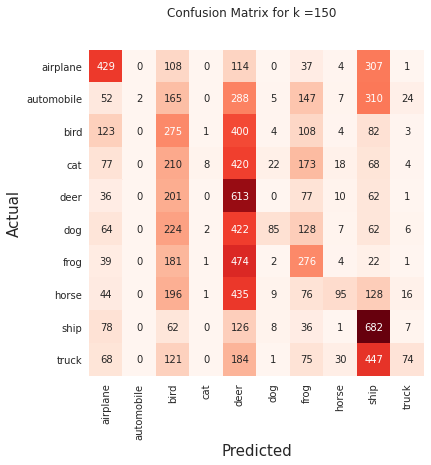

In [ ]:
#cmaps = ['viridis', 'icefire', 'Accent', 'Blues','Spectral','Reds','Purples','Pastel2']
for c in range(len(classifiers)):
  
  cm = confusion_matrix(y_test, pred[c])
  plt.figure(figsize=(6,6))
  sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap='Reds')
  plt.suptitle("Confusion Matrix for k =" + str(k_choices[c]))
  plt.xlabel('Predicted') 
  plt.ylabel('Actual')
  plt.show()
  print()


In [ ]:
for i in range(len(reports)):
  print("Classification Report for K = ",k_choices[i])
  print(reports[i])
  print()
  print()

Classification Report for K =  5
              precision    recall  f1-score   support

           0       0.34      0.44      0.39      1000
           1       0.62      0.09      0.15      1000
           2       0.19      0.37      0.25      1000
           3       0.25      0.13      0.17      1000
           4       0.20      0.47      0.28      1000
           5       0.37      0.19      0.25      1000
           6       0.29      0.30      0.29      1000
           7       0.55      0.16      0.24      1000
           8       0.36      0.60      0.45      1000
           9       0.64      0.13      0.21      1000

    accuracy                           0.29     10000
   macro avg       0.38      0.29      0.27     10000
weighted avg       0.38      0.29      0.27     10000



Classification Report for K =  8
              precision    recall  f1-score   support

           0       0.37      0.46      0.41      1000
           1       0.70      0.07      0.13      1000
          

In [ ]:
stf = StratifiedKFold(n_splits = 4)

classifier = KNeighborsClassifier(n_neighbors=100, weights='distance',algorithm = 'auto')

scores = cross_val_score(classifier, x, y, cv=stf,scoring = 'accuracy' )

In [ ]:
print("Cross Validation with 5000 samples", scores)

[0.272 0.26  0.277 0.266 0.263]


In [ ]:
stf = StratifiedKFold(n_splits = 5)

classifier = KNeighborsClassifier(n_neighbors=10, weights='distance',algorithm = 'auto')

scores2 = cross_val_score(classifier, [x_train_[i] for i in range(10000)], [y_train[i] for i in range(10000)], cv=stf,scoring = 'accuracy' )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [ ]:
print("Cross Validation with 10000 samples with k =10", scores2)

Cross Validation with 10000 samples [0.312  0.2955 0.2955 0.293  0.291 ]


In [ ]:
stf = StratifiedKFold(n_splits = 5)

classifier = KNeighborsClassifier(n_neighbors=10, weights='distance',algorithm = 'auto')

scores3 = cross_val_score(classifier, [x_train_[i] for i in range(20000)], [y_train[i] for i in range(20000)], cv=stf,scoring = 'accuracy' )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [ ]:
print("Cross Validation with 20000 samples with k =10", scores3)

Cross Validation with 20000 samples with k =10 [0.32775 0.32175 0.313   0.32225 0.30425]


In [ ]:
stf = StratifiedKFold(n_splits = 5)

classifier = KNeighborsClassifier(n_neighbors=10, weights='distance',algorithm = 'auto')

scores4 = cross_val_score(classifier, [x_train_[i] for i in range(50000)], [y_train[i] for i in range(50000)], cv=stf,scoring = 'accuracy' )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [ ]:
print("Cross Validation with 50000 samples with k =10", scores4)

Cross Validation with 50000 samples with k =10 [0.3482 0.3373 0.352  0.3418 0.3394]


In [ ]:
stf = StratifiedKFold(n_splits = 5)

classifier = KNeighborsClassifier(n_neighbors=100, weights='distance',algorithm = 'auto')

scores5 = cross_val_score(classifier, [x_train_[i] for i in range(50000)], [y_train[i] for i in range(50000)], cv=stf,scoring = 'accuracy' )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [ ]:
print("Cross Validation with 50000 samples with k =100", scores5)

Cross Validation with 50000 samples with k =100 [0.3016 0.2932 0.3078 0.2996 0.2969]


Final Classifier

In [ ]:
cls = KNeighborsClassifier(n_neighbors=10, weights='distance',algorithm = 'auto')
cls.fit(x_train_,y_train_.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [ ]:
predictions = cls.predict(x_test_)
predictions 

array([4, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [ ]:
acc_ = cls.score(x_test_,y_test_.values.ravel())
print(classification_report(y_test_.values.ravel(), predictions))

              precision    recall  f1-score   support

           0       0.48      0.49      0.48      1000
           1       0.78      0.17      0.28      1000
           2       0.24      0.40      0.30      1000
           3       0.31      0.17      0.22      1000
           4       0.24      0.57      0.33      1000
           5       0.43      0.26      0.33      1000
           6       0.33      0.32      0.33      1000
           7       0.68      0.23      0.35      1000
           8       0.37      0.73      0.49      1000
           9       0.72      0.18      0.29      1000

    accuracy                           0.35     10000
   macro avg       0.46      0.35      0.34     10000
weighted avg       0.46      0.35      0.34     10000



In [ ]:
print("Accuracy = ",acc_*100)

Accuracy =  35.13


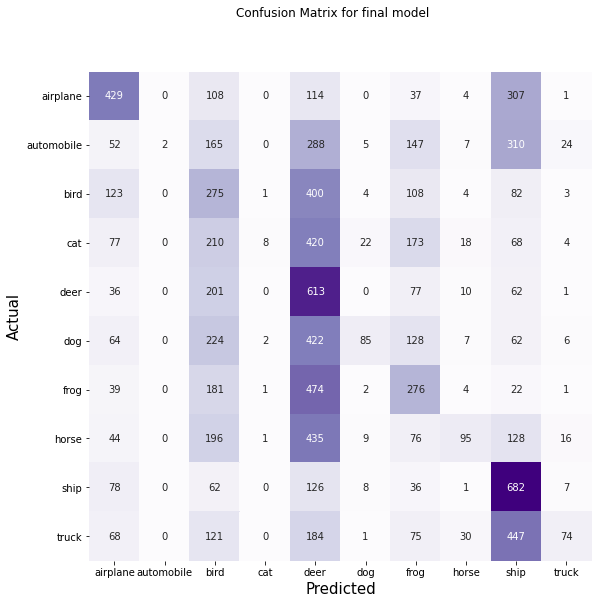

In [ ]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap='Purples')
plt.suptitle("Confusion Matrix for final model")
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.show()
#print()